In [1]:
include(joinpath("..","src","setup.jl"))

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/davidlittle/.julia/packages/Compose/wlPCt/src/Compose.jl:164
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [2]:
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

"../data/count_lengths/run_2018-11-26"

In [3]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data"),reinterpret="reinterpret") do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.2,2,2018-11-26T17:38:30.128,1
2,11.4,1,2018-11-26T17:38:30.128,1
3,0.4,2,2018-11-26T17:38:30.128,1
4,5.1,1,2018-11-26T17:38:30.128,1
5,0.4,2,2018-11-26T17:38:30.128,1
6,18.6,1,2018-11-26T17:38:30.128,1


In [4]:
hstr,hlen = human_error_by_sid(resample=1000,N=N_for_pressnitzer_hupe_2006);

In [5]:
quantile(hlen.x1,(0.025,0.5,0.975))

(0.11963470319634695, 0.2073059360730593, 0.3745433789954336)

In [41]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params[fields])))
df_summary = by(params,fields) do row
    next!(progress)
    err = model_error(df,params;(k => row[1,k] for k in fields)...)
    stt = model_stream_stats(df,params;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,
              error_diff = err.lengths - err.stream,
              stream_ratio = err.stream / err.lengths,
              stream_spread = stt.spread,
              stream_shift = stt.shift,
              eratio = error_ratio(err,human_error(N=N_for_pressnitzer_hupe_2006)))
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,error_diff,stream_ratio,stream_spread,stream_shift,eratio
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.474594,0.404818,-0.0697761,1.17236,-0.491088,-1.26919,2.8502
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.261357,0.289171,0.0278139,0.903815,0.24173,-0.442544,1.70897
3,0.0,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.265539,0.388889,0.12335,0.682815,0.223439,0.421181,1.95447
4,0.0,44.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.262928,1.0,0.737072,0.262928,0.11994,0.534381,3.38119
5,0.0,130.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.26317,1.0,0.73683,0.26317,0.110914,0.543407,3.35898
6,0.0,390.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.262932,1.0,0.737068,0.262932,0.111201,0.54312,3.37217
7,0.0,1100.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.27456,0.717278,0.442718,0.382781,0.14993,0.358554,2.76496
8,0.0,3400.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.263395,1.0,0.736605,0.263395,0.103843,0.550478,3.40707
9,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.264263,1.0,0.735737,0.264263,0.138839,0.515482,3.35152


In [42]:
dfplot_ind = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio,:error_diff,:stream_ratio,:stream_shift,:stream_spread]) |>
    transform(a = packaxes(:c_a,pad=0.25), m = packaxes(:c_m,pad=0.25), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.1f",round.(:eratio,digits=1)),
              error_diff_str = fmt.("01.1f",round.(:error_diff,digits=1)),
              stream_ratio_str = fmt.("01.1f",round.(:stream_ratio,digits=1)),
              stream_spread_str = fmt.("01.1f",round.(:stream_spread,digits=1)),
              stream_shift_str = fmt.("01.1f",round.(:stream_shift,digits=1)))
              
head(dfplot_ind)

,c_a,c_m,level,stream_error,length_error,eratio,error_diff,stream_ratio,stream_shift,stream_spread,a,m,rand,eratio_str,error_diff_str,stream_ratio_str,stream_spread_str,stream_shift_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String,String,String,String
1,0.0,0.0,Peripheral,0.474594,0.404818,2.8502,-0.0697761,1.17236,-1.26919,-0.491088,0.0,0.0,0.263708,2.9,-0.1,1.2,-0.5,-1.3
2,0.0,5.0,Peripheral,0.261357,0.289171,1.70897,0.0278139,0.903815,-0.442544,0.24173,0.0,1.25,1.05724,1.7,0.0,0.9,0.2,-0.4
3,0.0,15.0,Peripheral,0.265539,0.388889,1.95447,0.12335,0.682815,0.421181,0.223439,0.0,2.25,-0.776214,2.0,0.1,0.7,0.2,0.4
4,0.0,44.0,Peripheral,0.262928,1.0,3.38119,0.737072,0.262928,0.534381,0.11994,0.0,3.25,0.736244,3.4,0.7,0.3,0.1,0.5
5,0.0,130.0,Peripheral,0.26317,1.0,3.35898,0.73683,0.26317,0.543407,0.110914,0.0,4.25,1.65968,3.4,0.7,0.3,0.1,0.5
6,0.0,390.0,Peripheral,0.262932,1.0,3.37217,0.737068,0.262932,0.54312,0.111201,0.0,5.25,0.656712,3.4,0.7,0.3,0.1,0.5


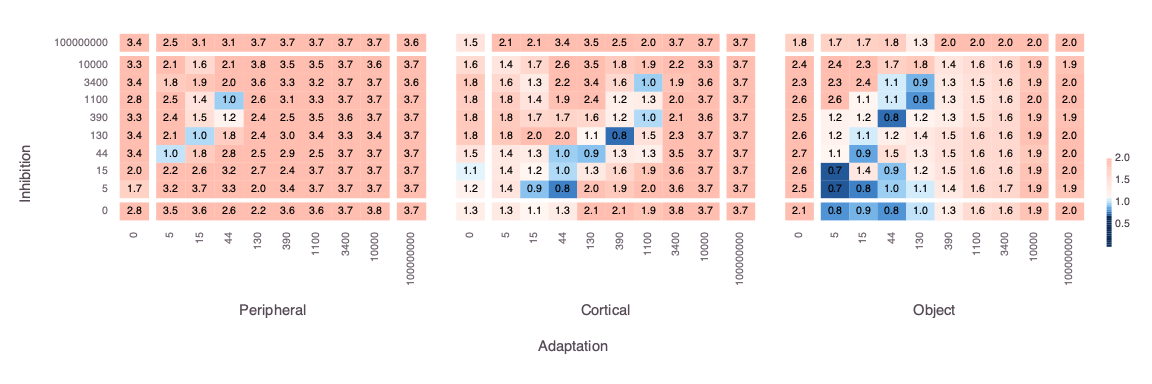

false

In [34]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PNG(12inch,4inch),pl)

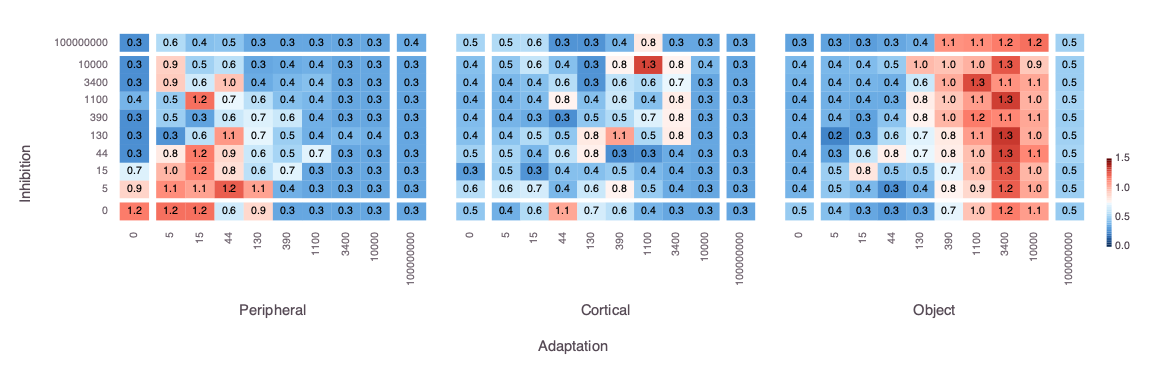

false

In [46]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:stream_ratio,xgroup=:level,label=:stream_ratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=0,maxvalue=1.5,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,maxvalue=2,midvalue=1.0)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PNG(12inch,4inch),pl)

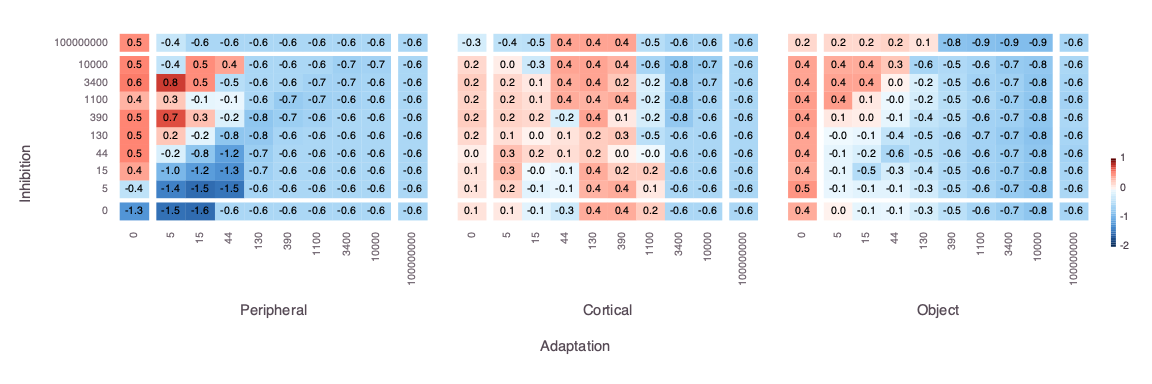

false

In [47]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:stream_shift,xgroup=:level,label=:stream_shift_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=-2,maxvalue=1,colormap=colorscale("RdBu",reverse=true,minvalue=-2,maxvalue=1,midvalue=0)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PNG(12inch,4inch),pl)

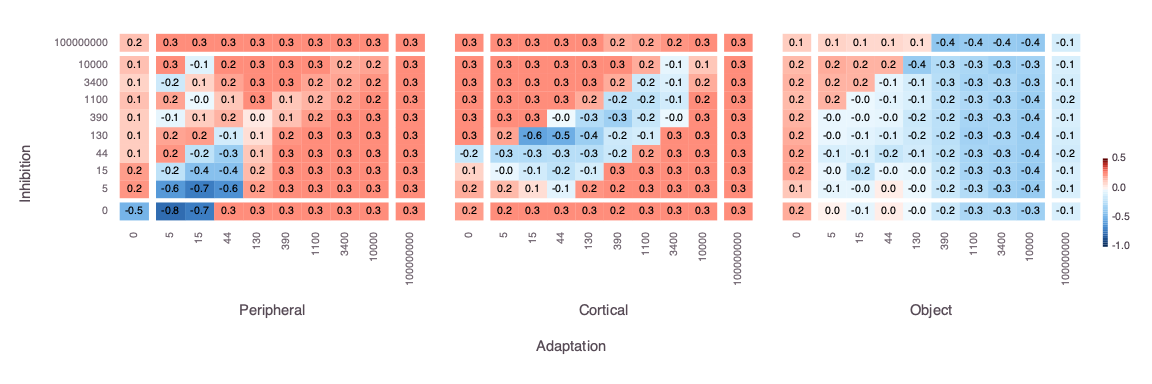

false

In [48]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:stream_spread,xgroup=:level,label=:stream_spread_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=-1,maxvalue=0.5,colormap=colorscale("RdBu",reverse=true,minvalue=-1,maxvalue=0.5,midvalue=0)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PNG(12inch,4inch),pl)